In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('train_clinical_data.csv')

In [4]:
df

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
...,...,...,...,...,...,...,...,...
2610,65043_48,65043,48,7.0,6.0,13.0,0.0,Off
2611,65043_54,65043,54,4.0,8.0,11.0,1.0,Off
2612,65043_60,65043,60,6.0,6.0,16.0,1.0,Off
2613,65043_72,65043,72,3.0,9.0,14.0,1.0,Off


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2615 entries, 0 to 2614
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   visit_id                             2615 non-null   object 
 1   patient_id                           2615 non-null   int64  
 2   visit_month                          2615 non-null   int64  
 3   updrs_1                              2614 non-null   float64
 4   updrs_2                              2613 non-null   float64
 5   updrs_3                              2590 non-null   float64
 6   updrs_4                              1577 non-null   float64
 7   upd23b_clinical_state_on_medication  1288 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 163.6+ KB


In [8]:
df.describe()

,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,updrs
count,2615.000000,2615.000000,2614.000000,2613.00000,2590.000000,1577.000000,1562.000000
mean,32651.743786,31.190822,7.110559,6.74359,19.421236,1.861763,43.320102
std,18535.758700,25.199053,5.525955,6.32323,15.000289,3.022112,23.948722
min,55.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,16574.000000,10.500000,3.000000,1.00000,6.000000,0.000000,28.000000
50%,29417.000000,24.000000,6.000000,5.00000,19.000000,0.000000,40.000000
75%,50611.000000,48.000000,10.000000,10.00000,29.000000,3.000000,58.000000
max,65043.000000,108.000000,33.000000,40.00000,86.000000,20.000000,172.000000


<AxesSubplot:xlabel='patient_id', ylabel='visit_month'>

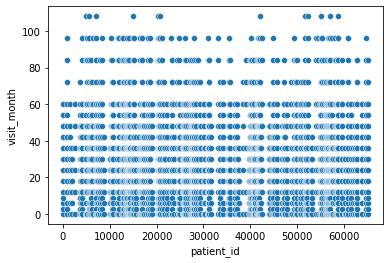

In [10]:
sns.scatterplot(data=df, y='visit_month', x='patient_id')

<AxesSubplot:xlabel='patient_id', ylabel='updrs_1'>

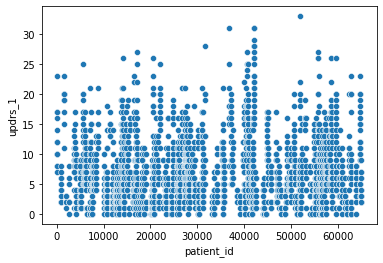

In [12]:
sns.scatterplot(data=df, y='updrs_1', x='patient_id')

<AxesSubplot:xlabel='patient_id', ylabel='updrs_2'>

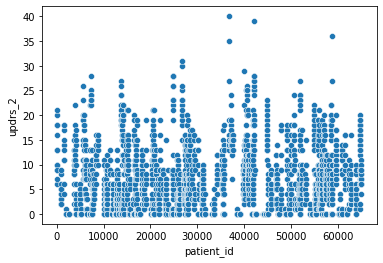

In [13]:
sns.scatterplot(data=df, y='updrs_2', x='patient_id')

<AxesSubplot:xlabel='patient_id', ylabel='updrs_3'>

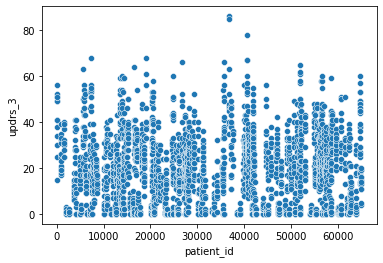

In [14]:
sns.scatterplot(data=df, y='updrs_3', x='patient_id')

<AxesSubplot:xlabel='patient_id', ylabel='updrs_4'>

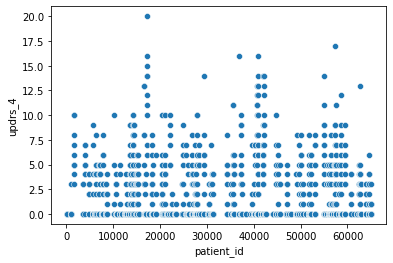

In [15]:
sns.scatterplot(data=df, y='updrs_4', x='patient_id')

# Plotting disease progression of Patient 23391

<AxesSubplot:xlabel='visit_month'>

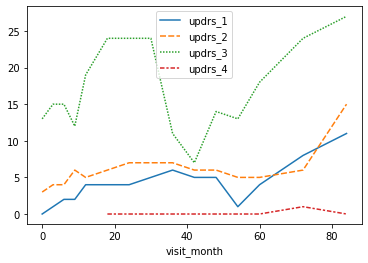

In [78]:
sns.lineplot(data=df[df['patient_id'] == 23391][['updrs_1','updrs_2','updrs_3', 'updrs_4','visit_month']].set_index('visit_month'))

<AxesSubplot:xlabel='visit_month'>

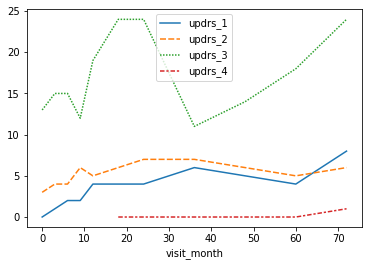

In [80]:
sns.lineplot(data=df[(df['patient_id'] == 23391) & (df['upd23b_clinical_state_on_medication'] != 'On')][['updrs_1','updrs_2','updrs_3', 'updrs_4','visit_month']].set_index('visit_month'))

# Long term patients

In [28]:
patient_ids = df[df['visit_month']> 60]['patient_id']
long_term_patients = df[df['patient_id'].isin(patient_ids)]

In [29]:
long_term_patients

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,updrs
13,942_0,942,0,3.0,2.0,20.0,NaN,NaN,NaN
14,942_3,942,3,7.0,2.0,17.0,NaN,NaN,NaN
15,942_6,942,6,8.0,2.0,21.0,NaN,NaN,NaN
16,942_12,942,12,5.0,2.0,25.0,0.0,NaN,32.0
17,942_18,942,18,6.0,5.0,18.0,0.0,NaN,29.0
...,...,...,...,...,...,...,...,...,...
2610,65043_48,65043,48,7.0,6.0,13.0,0.0,Off,26.0
2611,65043_54,65043,54,4.0,8.0,11.0,1.0,Off,24.0
2612,65043_60,65043,60,6.0,6.0,16.0,1.0,Off,29.0
2613,65043_72,65043,72,3.0,9.0,14.0,1.0,Off,27.0


In [40]:
long_term_patients.groupby('patient_id')['upd23b_clinical_state_on_medication'].value_counts().sort_values(ascending=False)

patient_id  upd23b_clinical_state_on_medication
40200       On                                     13
58189       On                                     12
49995       On                                     12
52266       Off                                    12
27971       On                                     11
                                                   ..
52266       On                                      1
31270       On                                      1
40874       On                                      1
41883       Off                                     1
65043       On                                      1
Name: upd23b_clinical_state_on_medication, Length: 155, dtype: int64

# Plotting disease progression of Patient 40200 (heavy medication)

In [43]:
long_term_patients[long_term_patients['patient_id'] == 40200]

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,updrs
1562,40200_0,40200,0,0.0,4.0,16.0,NaN,NaN,NaN
1563,40200_3,40200,3,0.0,4.0,16.0,NaN,NaN,NaN
1564,40200_6,40200,6,0.0,6.0,21.0,NaN,NaN,NaN
1565,40200_9,40200,9,0.0,5.0,11.0,0.0,On,16.0
1566,40200_12,40200,12,1.0,10.0,28.0,0.0,On,39.0
1567,40200_18,40200,18,0.0,9.0,28.0,0.0,On,37.0
1568,40200_24,40200,24,2.0,3.0,18.0,0.0,On,23.0
1569,40200_30,40200,30,3.0,9.0,25.0,0.0,On,37.0
1570,40200_36,40200,36,0.0,7.0,32.0,0.0,On,39.0
1571,40200_42,40200,42,4.0,15.0,40.0,0.0,On,59.0


<AxesSubplot:xlabel='visit_month'>

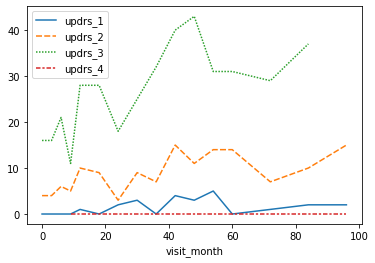

In [44]:
sns.lineplot(data=long_term_patients[long_term_patients['patient_id'] == 40200][['updrs_1','updrs_2','updrs_3', 'updrs_4','visit_month']].set_index('visit_month'))

# Plotting disease progression of Patient 64674 (minimal medication)

In [26]:
long_term_patients[long_term_patients['patient_id'] == 64674]

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,updrs
2584,64674_0,64674,0,5.0,1.0,13.0,NaN,NaN,NaN
2585,64674_3,64674,3,5.0,2.0,14.0,NaN,NaN,NaN
2586,64674_6,64674,6,11.0,7.0,20.0,NaN,NaN,NaN
2587,64674_9,64674,9,10.0,6.0,19.0,NaN,NaN,NaN
2588,64674_12,64674,12,9.0,9.0,18.0,NaN,NaN,NaN
2589,64674_18,64674,18,3.0,6.0,29.0,NaN,NaN,NaN
2590,64674_24,64674,24,12.0,12.0,26.0,NaN,NaN,NaN
2591,64674_30,64674,30,12.0,18.0,48.0,NaN,NaN,NaN
2592,64674_36,64674,36,11.0,18.0,44.0,1.0,NaN,74.0
2593,64674_42,64674,42,5.0,18.0,48.0,2.0,NaN,73.0


With medication

<AxesSubplot:xlabel='visit_month'>

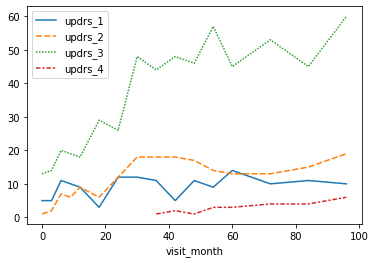

In [31]:
sns.lineplot(data=long_term_patients[long_term_patients['patient_id'] == 64674][['updrs_1','updrs_2','updrs_3', 'updrs_4','visit_month']].set_index('visit_month'))

Without medication 

<AxesSubplot:xlabel='visit_month'>

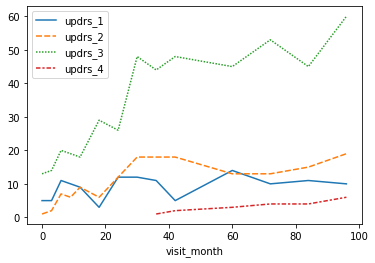

In [32]:
sns.lineplot(data=long_term_patients[(long_term_patients['patient_id'] == 64674) & (long_term_patients['upd23b_clinical_state_on_medication'] != 'On')][['updrs_1','updrs_2','updrs_3', 'updrs_4','visit_month']].set_index('visit_month'))

# Short term patients

In [55]:
temp = pd.DataFrame(df.groupby('patient_id')['visit_month'].max().sort_values(ascending=True))
temp.reset_index(inplace=True)
patient_ids = temp[temp['visit_month'] < 30]['patient_id']
short_term_patients = df[df['patient_id'].isin(patient_ids)]

In [56]:
short_term_patients

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,updrs
297,10053_0,10053,0,3.0,0.0,13.0,0.0,NaN,16.0
298,10053_6,10053,6,2.0,4.0,5.0,0.0,NaN,11.0
299,10053_12,10053,12,4.0,2.0,8.0,0.0,NaN,14.0
300,10053_18,10053,18,2.0,2.0,0.0,0.0,NaN,4.0
301,10053_24,10053,24,4.0,3.0,0.0,0.0,NaN,7.0
568,14450_0,14450,0,3.0,0.0,0.0,NaN,NaN,NaN
569,14450_12,14450,12,0.0,0.0,2.0,NaN,NaN,NaN
570,14450_24,14450,24,0.0,0.0,2.0,NaN,NaN,NaN
1316,30119_0,30119,0,11.0,13.0,40.0,0.0,On,64.0
1317,30119_6,30119,6,12.0,13.0,37.0,0.0,On,62.0


In [58]:
short_term_patients.groupby('patient_id')['visit_month'].size()

patient_id
10053    5
14450    3
30119    5
35675    5
40967    5
52119    6
60443    3
62732    4
Name: visit_month, dtype: int64

# Plotting disease progression of patient 52119

In [61]:
short_term_patients[short_term_patients['patient_id'] == 52119]

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,updrs
2052,52119_0,52119,0,2.0,4.0,16.0,NaN,NaN,NaN
2053,52119_3,52119,3,3.0,4.0,29.0,NaN,NaN,NaN
2054,52119_6,52119,6,3.0,9.0,38.0,NaN,NaN,NaN
2055,52119_9,52119,9,1.0,6.0,33.0,0.0,On,40.0
2056,52119_12,52119,12,2.0,5.0,NaN,0.0,NaN,NaN
2057,52119_18,52119,18,3.0,2.0,19.0,0.0,On,24.0


<AxesSubplot:xlabel='visit_month'>

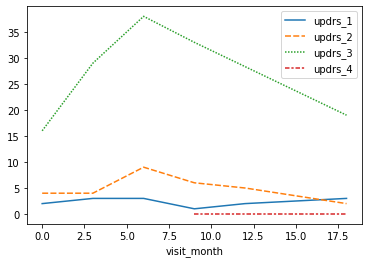

In [60]:
sns.lineplot(data=short_term_patients[short_term_patients['patient_id'] == 52119][['updrs_1','updrs_2','updrs_3', 'updrs_4','visit_month']].set_index('visit_month'))

# Plotting the UPDRS total score with visit month

In [75]:
df['updrs'] = df['updrs_1'].fillna(0)+df['updrs_2'].fillna(0)+df['updrs_3'].fillna(0)+df['updrs_4'].fillna(0)
df['upd23b_clinical_state_on_medication'].fillna('Not medicated', inplace=True)

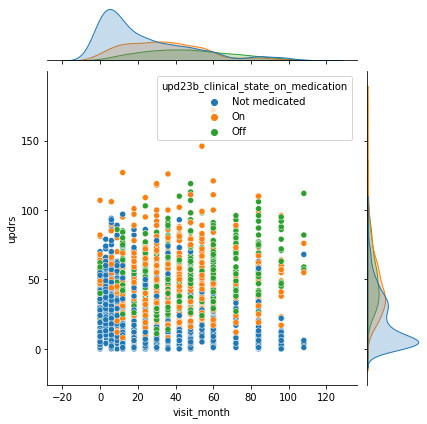

In [77]:
sns.jointplot(data=df, x='visit_month', y='updrs', hue='upd23b_clinical_state_on_medication')

Is the medication making any difference? Or was this data not collected for testing medication effectiveness?